<a href="https://colab.research.google.com/github/mdforhadcse/Data-Science-project/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data cleansing is also important because it improves your data quality and in doing so, increases overall productivity. When you clean your data, all outdated or incorrect information is gone – leaving you with the highest quality information.

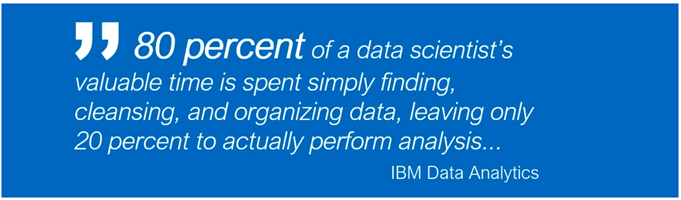

#First we load the target dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/fazlyrabbi77/DataProcessing/master/real-estate.csv')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


Here we choose a simple dataset having 9 rows and 8 columns because we will apply different types of data cleaning function and see the changes. It is a real state dataset.

We can easily seeing that there are some NaN value and garbage  value 

So this dataset is inappropriate for data modelling thats why we need to clean our data set

In [2]:
#Renaming Columns with inplace
df.rename(columns = {"NUM_BEDROOMS": "BEDROOMS",  "NUM_BATH":"BATH"},inplace=True) 
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


##Check NaN value

In [3]:
df.isnull().values.any()

True

That means there is a null value. Now we find the total NaN values in the dataset

In [4]:
df.isnull().values.sum()

8

Now we want to see which row has NaN value.

In [5]:
#Showing the null values as per attributes
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

PID             1
ST_NUM          2
OWN_OCCUPIED    1
BEDROOMS        2
BATH            1
SQ_FT           1
dtype: int64

Now print the whole dataset corresponding null value

In [7]:
print(df[df.isnull().any(axis=1)][null_columns])

           PID  ST_NUM OWN_OCCUPIED BEDROOMS    BATH SQ_FT
2  100003000.0     NaN            N      NaN       1   850
3  100004000.0   201.0           12        1     NaN   700
4          NaN   203.0            Y        3       2  1600
5  100006000.0   207.0            Y      NaN       1   800
6  100007000.0     NaN          NaN        2  HURLEY   950
7  100008000.0   213.0            Y        1       1   NaN


##NaN value handling

In [8]:
# Filling null values with specific value
df['PID'].fillna(100005000,inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


If we want to remove whole column: df.drop(['column_name'], axis=1, inplace=True)


and if we remove specific cell: df.drop([7,8])
that means row 7 and column 8 will be remove

In [9]:
# Row wise data filling
df.loc[2,'ST_NUM'] = 197
df.loc[6,'ST_NUM'] = 208
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,197.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,208.0,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [10]:
#unwanted value treatment in OWN_OCCUPIED column
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,197.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,208.0,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


BEDROOMS, BATH and SQ_FT this three coloumn fields should be numeric value but there are some non numeric value value. So we have to first convert that non numeric value into NaN

In [11]:
df['BEDROOMS'] = pd.to_numeric(df['BEDROOMS'], errors='coerce')
df['BATH'] = pd.to_numeric(df['BATH'], errors='coerce')
df['SQ_FT'] = pd.to_numeric(df['SQ_FT'], errors='coerce')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,197.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,208.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


Fill the NaN by Mode value

In [12]:
df['OWN_OCCUPIED'].fillna(df['OWN_OCCUPIED'].mode()[0], inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,197.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,208.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


Using median

In [15]:
#Group By parameter check
df.groupby('BEDROOMS')['SQ_FT'].median()

BEDROOMS
1.0     700.0
2.0     950.0
3.0    1300.0
Name: SQ_FT, dtype: float64

Filling Null with median value

In [18]:
# Filling Null with group by vparameter
df['SQ_FT'] = df['SQ_FT'].fillna(df.groupby('BEDROOMS')['SQ_FT'].transform('median'))
df['SQ_FT'] = df['SQ_FT'].fillna(df['SQ_FT'].median())
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1300.0
2,100003000.0,197.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,208.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,700.0
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [19]:
df.loc[2,'BEDROOMS'] = 1
df.loc[5,'BEDROOMS'] = 1
df.loc[8,'BEDROOMS'] = 3
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1300.0
2,100003000.0,197.0,LEXINGTON,N,1.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,1.0,1.0,800.0
6,100007000.0,208.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,700.0
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


**bfill and ffill **
*   Ffill or forward-fill propagates the last observed non-null value forward until another non-null value is encountered
*   Bfill or backward-fill propagates the first observed non-null value backward until another non-null value is met.



In [20]:
df['BATH']=df['BATH'].fillna(method='bfill')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1300.0
2,100003000.0,197.0,LEXINGTON,N,1.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,2.0,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,1.0,1.0,800.0
6,100007000.0,208.0,WASHINGTON,Y,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,700.0
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


##Type conversion

In [21]:
#Converting street number to int
df.PID = df.PID.astype('int64') 
df.ST_NUM = df.ST_NUM.astype('int64') 
df.BEDROOMS = df.BEDROOMS.astype('int64') 
df.BATH = df.BATH.astype('int64') 
df.SQ_FT = df.SQ_FT.astype('int64') 
df


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3,1,1000
1,100002000,197,LEXINGTON,N,3,1,1300
2,100003000,197,LEXINGTON,N,1,1,850
3,100004000,201,BERKELEY,Y,1,2,700
4,100005000,203,BERKELEY,Y,3,2,1600
5,100006000,207,BERKELEY,Y,1,1,800
6,100007000,208,WASHINGTON,Y,2,1,950
7,100008000,213,TREMONT,Y,1,1,700
8,100009000,215,TREMONT,Y,3,2,1800


##Finally we got our clean dataset
